In [256]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,LSTM ,Dropout ,Input ,Dropout
import os
import datetime

In [257]:
microsoft_data = pd.read_csv('E:/Data/script/Datasets/rnn_dataset/MicrosoftStock.csv')

In [258]:
microsoft_data.shape

(1259, 8)

In [259]:
microsoft_data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [260]:
# Suprimmer la colonne Name
microsoft_data.drop(['index','Name'],axis=1,inplace=True)

In [261]:
microsoft_data['date'] = pd.to_datetime(microsoft_data['date'])

In [262]:
microsoft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [263]:
# microsoft_data = microsoft_data.set_index('date')


In [264]:
microsoft_data.head()

,date,open,high,low,close,volume
0,2013-02-08,27.35,27.71,27.31,27.55,33318306
1,2013-02-11,27.65,27.92,27.50,27.86,32247549
2,2013-02-12,27.88,28.00,27.75,27.88,35990829
3,2013-02-13,27.93,28.11,27.88,28.03,41715530
4,2013-02-14,27.92,28.06,27.87,28.04,32663174


In [265]:
microsoft_data.describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,51.026394,51.436007,50.630397,51.063081,3.386946e+07
min,2013-02-08 00:00:00,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,2014-05-10 12:00:00,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,2015-08-10 00:00:00,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,2016-11-05 12:00:00,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,2018-02-07 00:00:00,95.140000,96.070000,93.720000,95.010000,2.483542e+08
std,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07


## Visualisation de donnée

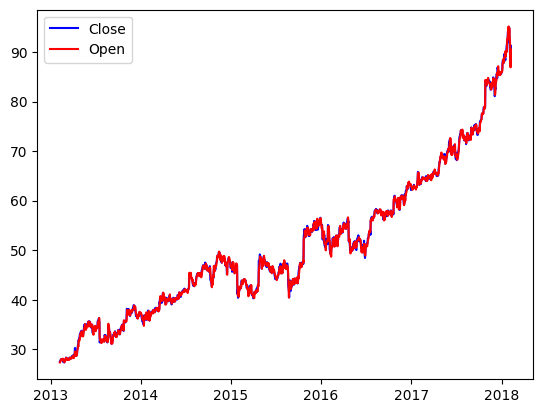

In [266]:
plt.plot(microsoft_data['date'],microsoft_data['close'],color='blue' ,label='Close')
plt.plot(microsoft_data['date'],microsoft_data['open'],color='red' ,label ="Open" )
plt.legend()
plt.show()

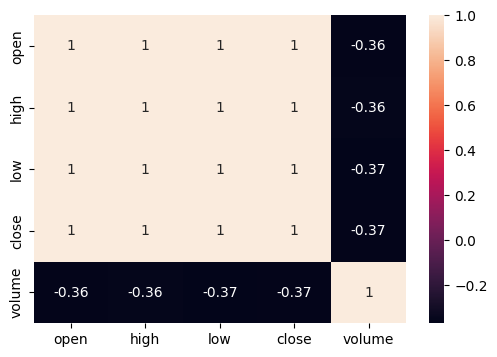

In [267]:
numeric_col = ['open', 'high', 'low', 'close', 'volume']
numeric_data = microsoft_data[numeric_col]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

In [268]:
def gen_data(data ,windows):
    X_train,Y_train = [] ,[]
    for i in range(windows ,len(data)):
        X_train.append(data.loc[i-windows:i-1,0].values)
        Y_train.append(data.loc[i,0])
    return X_train ,Y_train

## Normalisation

In [269]:
close = pd.DataFrame(microsoft_data['close'])

In [270]:
scale = StandardScaler()

close = pd.DataFrame(scale.fit_transform(close))

In [271]:
close

,0
0,-1.583776
1,-1.562895
2,-1.561548
3,-1.551444
4,-1.550771
...,...
1254,2.909625
1255,2.742579
1256,2.487968
1257,2.712268


In [272]:
data,target = gen_data(close,60)
data ,target= np.array(data) ,np.array(target)

In [273]:
data = data.reshape(-1,60,1)

In [274]:
data.shape

(1199, 60, 1)

In [275]:
training_len = int(np.ceil(len(data)*0.95))

In [ ]:
train_data = data[:training_len,:,:]


train_target = target[:training_len]


In [304]:
test_data = data[training_len -60: ,:,:]
test_target = target[training_len -60:]

In [305]:
test_target.shape

(119,)

In [278]:
train_data.shape

(1140, 60, 1)

In [303]:
test_data.shape

(119, 60, 1)

## Building the model

In [279]:
model = Sequential()

In [280]:
model.add(Input(shape=(60,1)))
model.add(LSTM(64 ,return_sequences=True))

model.add(LSTM(64,return_sequences= False)) 

model.add(Dense(128,activation='relu')) 

model.add(Dropout(0.5))

model.add(Dense(1 ,activation='linear'))

print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [281]:
model.compile(
    loss ='mae',
    optimizer='adam'
)

In [282]:
history = model.fit(train_data,train_target ,batch_size=32,epochs=50)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.2440
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.1249
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.1276
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.1177
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.1099
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.1123
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1134
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.1111
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1016
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.1005
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1030
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.1048
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0967
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0986
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.1006
Epoc

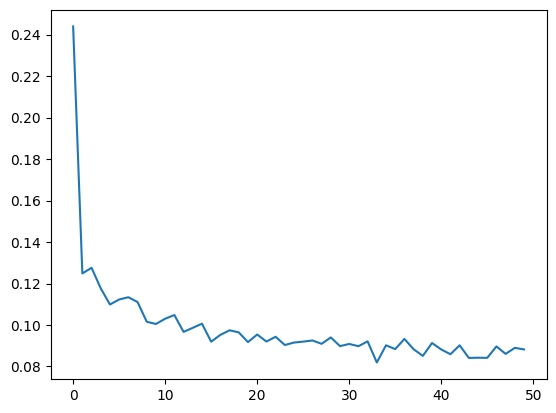

In [283]:
loss = history.history['loss']

plt.plot(loss)
plt.show()

In [306]:
prediction = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [320]:
train_data.shape

(1140, 60, 1)

In [316]:
test = microsoft_data[training_len:]

In [317]:
test= test.copy()

In [325]:
test['prediction'] = scale.inverse_transform(prediction)

In [323]:
train = microsoft_data[:training_len ]

In [324]:
train.shape

(1140, 6)

## Plotting result

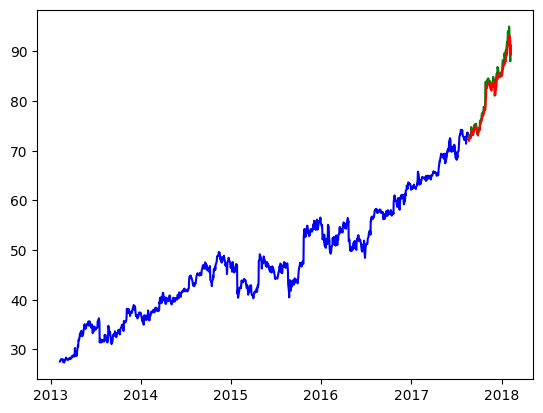

In [327]:

plt.plot(train['date'],train['close'] ,color = 'blue')
plt.plot(test['date'] ,test['close'] ,color ='green' ,label='Test')
plt.plot(test["date"] ,test['prediction'] ,color='red' ,label='prediction')
plt.show()

In [328]:
prediction.shape

(119, 1)

In [333]:
test_target.shape

(119,)

In [ ]:

for i in range(60,119):
